# **Muhammad Zaraar Malik**
# **BS - AI**

# **Import Necessary Libraries**

In [1]:
import os
import torch
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
# to encode the column names after reading the dataset
col_name_encoding={0: 'No_Dr', 1: 'Mild', 2: 'Moderate', 3: 'severe', 4: 'Proliferative DR'}
# base dataset path in kaggle directory
dataset_base_path='/kaggle/input/diabetic-retinopathy-balanced/content/Diabetic_Balanced_Data'

# **Data Analysis for the Training Folder**

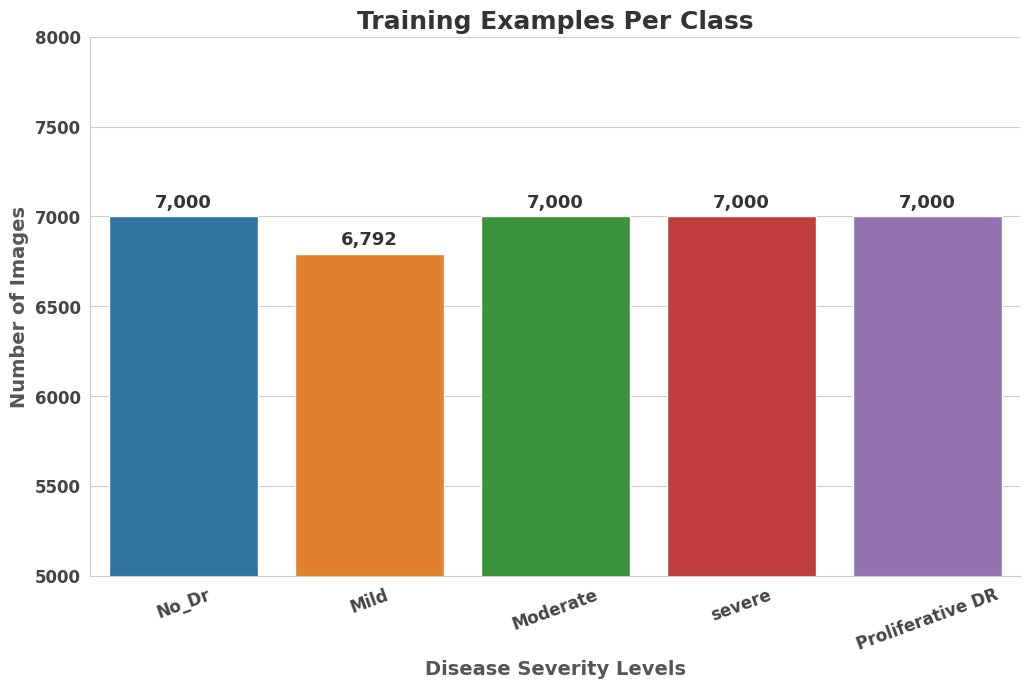

In [3]:
train_path = dataset_base_path + '/train'

# Get class names and counts
class_names = sorted(os.listdir(train_path))  # Ensure sorting matches encoding
training_examples = [len(os.listdir(os.path.join(train_path, class_name))) for class_name in class_names]

# Map folder names to class labels
class_labels = [col_name_encoding[int(cls)] for cls in class_names]

# Set a soft, elegant background
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

# Choose a soft but vibrant color palette
colors = sns.color_palette()

# Create the bar plot
ax = sns.barplot(x=class_labels, y=training_examples, palette=colors)

# Adjust y-axis to start from 5000
plt.ylim(5000, max(training_examples) + 1000)

# Add labels on top of bars with styling
for i, count in enumerate(training_examples):
    ax.text(i, count + 50, f"{count:,}", ha='center', fontsize=13, fontweight='bold', color='#333')

# Customize Title and Labels
plt.title("Training Examples Per Class", fontsize=18, fontweight='bold', color='#333')
plt.xlabel("Disease Severity Levels", fontsize=14, fontweight='bold', color='#555')
plt.ylabel("Number of Images", fontsize=14, fontweight='bold', color='#555')

# Rotate x-axis labels for better readability
plt.xticks(rotation=20, fontsize=12, fontweight='bold', color='#444')

# Customize y-axis labels
plt.yticks(fontsize=12, fontweight='bold', color='#444')

# Remove top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.show()

# **Data Analysis for the Validation Folder**

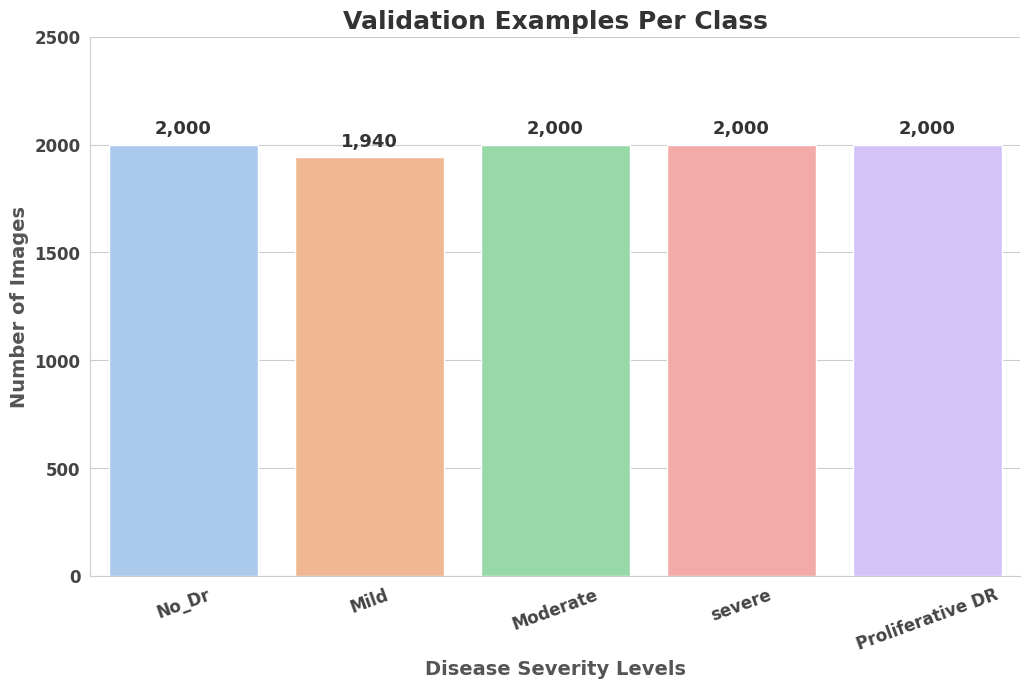

In [4]:
validation_path = dataset_base_path + '/val'

# Get class names and counts
class_names = sorted(os.listdir(validation_path))  # Ensure sorting matches encoding
validation_examples = [len(os.listdir(os.path.join(validation_path, class_name))) for class_name in class_names]
# Map folder names to class labels
class_labels = [col_name_encoding[int(cls)] for cls in class_names]

# Set a soft, elegant background
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

# Choose a soft but vibrant color palette
colors = sns.color_palette("pastel")

# Create the bar plot
ax = sns.barplot(x=class_labels, y=validation_examples, palette=colors)

# Adjust y-axis to start from 5000
plt.ylim(0, max(validation_examples) +500)

# Add labels on top of bars with styling
for i, count in enumerate(validation_examples):
    ax.text(i, count + 50, f"{count:,}", ha='center', fontsize=13, fontweight='bold', color='#333')

# Customize Title and Labels
plt.title("Validation Examples Per Class", fontsize=18, fontweight='bold', color='#333')
plt.xlabel("Disease Severity Levels", fontsize=14, fontweight='bold', color='#555')
plt.ylabel("Number of Images", fontsize=14, fontweight='bold', color='#555')

# Rotate x-axis labels for better readability
plt.xticks(rotation=20, fontsize=12, fontweight='bold', color='#444')

# Customize y-axis labels
plt.yticks(fontsize=12, fontweight='bold', color='#444')

# Remove top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.show()

# **Data Analysis for the Testing Folder**

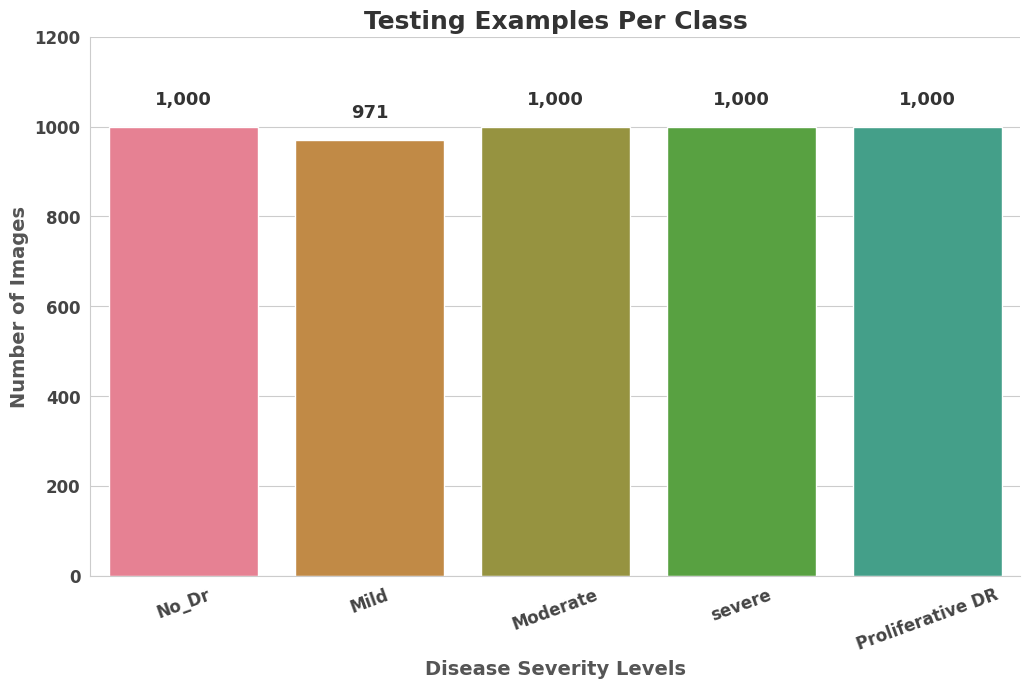

In [5]:
test_path = dataset_base_path + '/test'

# Get class names and counts
class_names = sorted(os.listdir(test_path))  # Ensure sorting matches encoding
testing_examples = [len(os.listdir(os.path.join(test_path, class_name))) for class_name in class_names]
# Map folder names to class labels
class_labels = [col_name_encoding[int(cls)] for cls in class_names]

# Set a soft, elegant background
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

# Choose a soft but vibrant color palette
colors = sns.color_palette("husl", 9)

# Create the bar plot
ax = sns.barplot(x=class_labels, y=testing_examples, palette=colors)

# Adjust y-axis to start from 5000
plt.ylim(0, max(testing_examples) +200)

# Add labels on top of bars with styling
for i, count in enumerate(testing_examples):
    ax.text(i, count + 50, f"{count:,}", ha='center', fontsize=13, fontweight='bold', color='#333')

# Customize Title and Labels
plt.title("Testing Examples Per Class", fontsize=18, fontweight='bold', color='#333')
plt.xlabel("Disease Severity Levels", fontsize=14, fontweight='bold', color='#555')
plt.ylabel("Number of Images", fontsize=14, fontweight='bold', color='#555')

# Rotate x-axis labels for better readability
plt.xticks(rotation=20, fontsize=12, fontweight='bold', color='#444')

# Customize y-axis labels
plt.yticks(fontsize=12, fontweight='bold', color='#444')

# Remove top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.show()

# **Checking base images and removing augmented images**
## **The class imbalanace is completely visible**

In [6]:
# Define dataset path
for i in ['train','val','test']:
    train_path = os.path.join(dataset_base_path, i)
    class_folders = sorted(os.listdir(train_path))
    
    image_paths = []
    print('Folder : ',i)
    for folder in class_folders:
        folder_path = os.path.join(train_path, folder)
        temp=os.listdir(folder_path)
        image_paths = list(filter(lambda path: "aug" not in path, temp))
        print('Label : ',col_name_encoding[int(folder)],' Total count : ',len(image_paths))
    print('\n')

Folder :  train
Label :  No_Dr  Total count :  5021
Label :  Mild  Total count :  1742
Label :  Moderate  Total count :  3495
Label :  severe  Total count :  453
Label :  Proliferative DR  Total count :  461


Folder :  val
Label :  No_Dr  Total count :  1471
Label :  Mild  Total count :  467
Label :  Moderate  Total count :  988
Label :  severe  Total count :  128
Label :  Proliferative DR  Total count :  120


Folder :  test
Label :  No_Dr  Total count :  722
Label :  Mild  Total count :  234
Label :  Moderate  Total count :  528
Label :  severe  Total count :  56
Label :  Proliferative DR  Total count :  66




### **Lets see how an image looks like in each stage of the Disease in the Training Data**

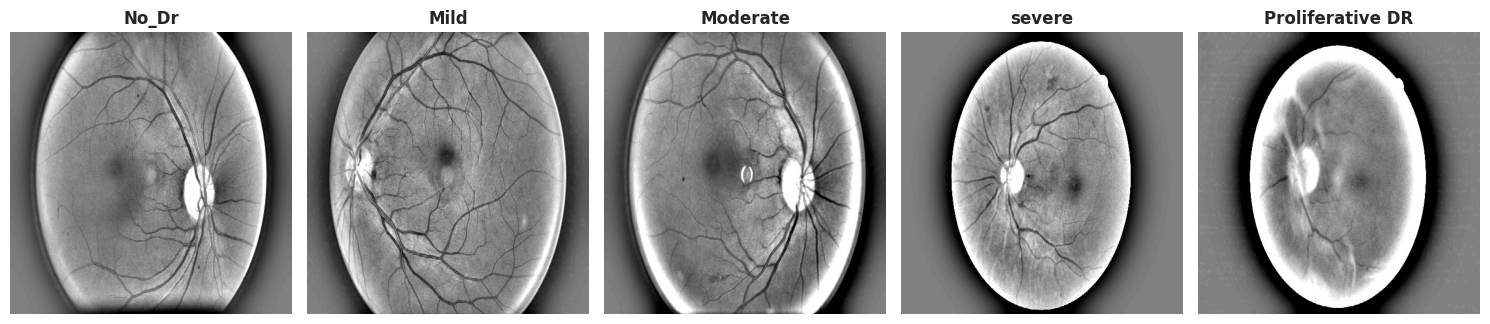

In [7]:
import os
import matplotlib.pyplot as plt
import cv2  # OpenCV for image reading

# Define dataset path
train_path = os.path.join(dataset_base_path, 'train')

# Get class folders (sorted for consistency)
class_folders = sorted(os.listdir(train_path))

# Select one sorted image per class
image_paths = []
for folder in class_folders:
    folder_path = os.path.join(train_path, folder)
    temp=os.listdir(folder_path)
    temper = list(filter(lambda path: "aug" not in path, temp))
    
    if temper:  # Ensure folder is not empty
        image_paths.append(os.path.join(folder_path, temper[0]))  # Pick the first sorted image

# Set up the plot
plt.figure(figsize=(15, 5))  # Adjust width based on number of classes

# Display images in a row
for i, img_path in enumerate(image_paths):
    img = cv2.imread(img_path)  # Read image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    plt.subplot(1, len(image_paths), i + 1)  # Row=1, Column=total_classes
    plt.imshow(img)
    plt.axis("off")  # Hide axes
    plt.title(f"{col_name_encoding[i]}", fontsize=12, fontweight='bold')  # Add titles

# Show the row of images
plt.tight_layout()
plt.show()


## **Currently the provided dataset already has augmented images of the base images.**
## **For now just simply make a Custom Dataset Class and train a Model and Check the Metrics**

In [8]:
# creating a Training DataFrame
def create_dataframe(base_path,folder_name):
    folder_path=base_path+'/'+folder_name
    hold=os.listdir(folder_path)
    image_paths=[]
    image_labels=[]
    for i in hold:
        labels=[i]*len(os.listdir(folder_path+'/'+i))
        path=[folder_path+'/'+i+'/'+tt for tt in os.listdir(folder_path+'/'+i)]
        image_paths.extend(path)
        image_labels.extend(labels)
    
    DATASET=pd.DataFrame({'File_Paths':image_paths,'Labels':image_labels})
    return DATASET

In [9]:
TRAIN_DATASET=create_dataframe(dataset_base_path,'train')
VAL_DATASET=create_dataframe(dataset_base_path,'val')
TEST_DATASET=create_dataframe(dataset_base_path,'test')

TRAIN_DATASET.head()


,File_Paths,Labels
0,/kaggle/input/diabetic-retinopathy-balanced/co...,2
1,/kaggle/input/diabetic-retinopathy-balanced/co...,2
2,/kaggle/input/diabetic-retinopathy-balanced/co...,2
3,/kaggle/input/diabetic-retinopathy-balanced/co...,2
4,/kaggle/input/diabetic-retinopathy-balanced/co...,2


### **Check Max Image Size**

In [10]:
VAL_DATASET.head()

,File_Paths,Labels
0,/kaggle/input/diabetic-retinopathy-balanced/co...,2
1,/kaggle/input/diabetic-retinopathy-balanced/co...,2
2,/kaggle/input/diabetic-retinopathy-balanced/co...,2
3,/kaggle/input/diabetic-retinopathy-balanced/co...,2
4,/kaggle/input/diabetic-retinopathy-balanced/co...,2


In [11]:
TEST_DATASET.head()

,File_Paths,Labels
0,/kaggle/input/diabetic-retinopathy-balanced/co...,2
1,/kaggle/input/diabetic-retinopathy-balanced/co...,2
2,/kaggle/input/diabetic-retinopathy-balanced/co...,2
3,/kaggle/input/diabetic-retinopathy-balanced/co...,2
4,/kaggle/input/diabetic-retinopathy-balanced/co...,2


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torch.utils.data import DataLoader
from torchvision.transforms import v2 as transforms
from torch.optim.lr_scheduler import StepLR
from torch.cuda.amp import GradScaler, autocast
import pandas as pd
from tqdm import tqdm
from PIL import Image

# Custom Dataset Class
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe
        self.transform = transforms.Compose([
            transforms.Resize((512, 512)),  # Ensure all images are (512,512)
            transforms.ToTensor(),  # Convert to tensor
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
        ])

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx]["File_Paths"]
        label = self.dataframe.iloc[idx]["Labels"]
        image = Image.open(img_path).convert("RGB")
        image = self.transform(image)
        label = torch.tensor(int(label), dtype=torch.long)
        return image, label



In [33]:
dataset = CustomDataset(TRAIN_DATASET)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

val_dataset=CustomDataset(VAL_DATASET)
val_loader=DataLoader(val_dataset, batch_size=32, shuffle=False)

test_dataset=CustomDataset(TEST_DATASET)

test_loader=DataLoader(test_dataset, batch_size=32, shuffle=False)

In [13]:

# Load Pretrained Model (ResNet50)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)
model.fc = nn.Linear(model.fc.in_features, 5)  # 5 classes
model = model.to(device)

# Define Loss, Optimizer, and Scheduler
loss_fn = nn.CrossEntropyLoss()  # Standard loss function for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)
scaler = GradScaler()  # For Mixed Precision Training

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 180MB/s]


In [22]:
model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)
model.fc.in_features

2048

In [23]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)
# model.fc = nn.Linear(model.fc.in_features, 5)  # 5 classes
# model = model.to(device)

# # Define Loss, Optimizer, and Scheduler
# loss_fn = nn.CrossEntropyLoss()  # Standard loss function for multi-class classification
# optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)
# scheduler = StepLR(optimizer, step_size=5, gamma=0.1)
# scaler = GradScaler()  # For Mixed Precision Training
# # Training Loop
# num_epochs = 10
# for epoch in range(num_epochs):
#     model.train()
#     running_loss = 0.0
#     pbar = tqdm(dataloader, desc=f"Epoch {epoch+1}/{num_epochs}")

#     for images, labels in pbar:
#         images, labels = images.to(device), labels.to(device)
#         optimizer.zero_grad()
#         with autocast():  # Mixed Precision
#             outputs = model(images)
#             loss = loss_fn(outputs, labels)

#         scaler.scale(loss).backward()
#         scaler.step(optimizer)
#         scaler.update()

#         running_loss += loss.item()
#         pbar.set_postfix(loss=running_loss / len(dataloader))

#     scheduler.step()
#     print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(dataloader):.4f}")

# # Save Model
# torch.save(model.state_dict(), "diabetic_retinopathy_model.pth")

In [ ]:
# import torch
# import torch.nn as nn
# from tqdm import tqdm

# # Load Model
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.load_state_dict(torch.load("/kaggle/input/finetuneed_resnet50_model/pytorch/default/1/diabetic_retinopathy_model_Finetune_Resnet50.pth"))
# model.to(device)
# model.eval()  # Set model to evaluation mode

# # Define Loss Function
# loss_fn = nn.CrossEntropyLoss()

# # Validation
# val_loss = 0.0
# correct = 0
# total = 0

# with torch.no_grad():
#     val_pbar = tqdm(val_loader, desc="Validating Model")
    
#     for images, labels in val_pbar:
#         images, labels = images.to(device), labels.to(device)
#         outputs = model(images)
    
#     # break
# #         loss = loss_fn(outputs, labels)

# #         val_loss += loss.item()
# #         _, predicted = torch.max(outputs, 1)
# #         correct += (predicted == labels).sum().item()
# #         total += labels.size(0)

# #         val_pbar.set_postfix(val_loss=val_loss / len(val_loader))

# # # Compute final metrics
# # val_loss /= len(val_loader)
# # val_acc = 100 * correct / total

# # print(f"\n🔹 Validation Loss: {val_loss:.4f} | Validation Accuracy: {val_acc:.2f}%")


In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from torch.cuda.amp import autocast, GradScaler
from torchvision import models
from tqdm import tqdm
import numpy as np
import os

# Device Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define Model with More Complexity
class DRModel(nn.Module):
    def __init__(self):
        super(DRModel, self).__init__()
        base_model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)
        in_features = base_model.fc.in_features

        # New classifier with BatchNorm and Dropout
        self.classifier = nn.Sequential(
            nn.Linear(in_features, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.4),

            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.4),

            nn.Linear(256, 5)  # 5 classes
        )

        base_model.fc = self.classifier
        self.base_model = base_model

    def forward(self, x):
        return self.base_model(x)

In [30]:

# Initialize Model
model = DRModel().to(device)

# Loss, Optimizer, and Scheduler
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)
scaler = GradScaler()

# Create a directory for saving checkpoints
os.makedirs("checkpoints", exist_ok=True)

# Early Stopping and Checkpointing
patience = 5  # Stop training if validation loss doesn't improve for 5 epochs
best_val_loss = np.inf
counter = 0

In [31]:
# Training Loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    pbar = tqdm(dataloader, desc=f"Epoch {epoch+1}/{num_epochs}")

    for images, labels in pbar:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        
        with autocast():  # Mixed Precision
            outputs = model(images)
            loss = loss_fn(outputs, labels)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        running_loss += loss.item()
        pbar.set_postfix(loss=running_loss / len(dataloader))

    scheduler.step()
    avg_train_loss = running_loss / len(dataloader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}")

    # Validation Loop
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = loss_fn(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = 100 * correct / total
    print(f"Validation Loss: {avg_val_loss:.4f}, Accuracy: {val_accuracy:.2f}%")

    # Save Model Checkpoint After Each Epoch
    checkpoint_path = f"checkpoints/epoch_{epoch+1}.pth"
    torch.save(model.state_dict(), checkpoint_path)
    print(f"📌 Model Checkpoint Saved: {checkpoint_path}")

    # Save Best Model
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        counter = 0  # Reset counter
        torch.save(model.state_dict(), "best_diabetic_retinopathy_model.pth")
        print("✅ Best Model Updated and Saved!")
    else:
        counter += 1
        print(f"⚠️ Early Stopping Counter: {counter}/{patience}")

    if counter >= patience:
        print("⏹️ Early Stopping Triggered! Training Stopped.")
        break  # Stop Training

print("🎯 Training Complete!")


Epoch 1/20: 100%|██████████| 1088/1088 [17:26<00:00,  1.04it/s, loss=1]    


Epoch [1/20], Train Loss: 1.0026
Validation Loss: 0.8786, Accuracy: 62.02%
📌 Model Checkpoint Saved: checkpoints/epoch_1.pth
✅ Best Model Updated and Saved!


Epoch 2/20: 100%|██████████| 1088/1088 [17:16<00:00,  1.05it/s, loss=0.827]


Epoch [2/20], Train Loss: 0.8272
Validation Loss: 0.8068, Accuracy: 67.51%
📌 Model Checkpoint Saved: checkpoints/epoch_2.pth
✅ Best Model Updated and Saved!


Epoch 3/20: 100%|██████████| 1088/1088 [17:20<00:00,  1.05it/s, loss=0.684]


Epoch [3/20], Train Loss: 0.6839
Validation Loss: 0.7310, Accuracy: 68.33%
📌 Model Checkpoint Saved: checkpoints/epoch_3.pth
✅ Best Model Updated and Saved!


Epoch 4/20: 100%|██████████| 1088/1088 [16:56<00:00,  1.07it/s, loss=0.572]


Epoch [4/20], Train Loss: 0.5717
Validation Loss: 0.7105, Accuracy: 70.65%
📌 Model Checkpoint Saved: checkpoints/epoch_4.pth
✅ Best Model Updated and Saved!


Epoch 5/20: 100%|██████████| 1088/1088 [17:04<00:00,  1.06it/s, loss=0.456]


Epoch [5/20], Train Loss: 0.4557
Validation Loss: 0.6825, Accuracy: 71.89%
📌 Model Checkpoint Saved: checkpoints/epoch_5.pth
✅ Best Model Updated and Saved!


Epoch 6/20: 100%|██████████| 1088/1088 [16:52<00:00,  1.07it/s, loss=0.213]


Epoch [6/20], Train Loss: 0.2128
Validation Loss: 0.6538, Accuracy: 74.96%
📌 Model Checkpoint Saved: checkpoints/epoch_6.pth
✅ Best Model Updated and Saved!


Epoch 7/20: 100%|██████████| 1088/1088 [17:09<00:00,  1.06it/s, loss=0.112]


Epoch [7/20], Train Loss: 0.1115
Validation Loss: 0.7196, Accuracy: 74.67%
📌 Model Checkpoint Saved: checkpoints/epoch_7.pth
⚠️ Early Stopping Counter: 1/5


Epoch 8/20:  15%|█▍        | 158/1088 [02:28<14:32,  1.07it/s, loss=0.00979]


KeyboardInterrupt: 

# **Testing the model on Test Dataset**

In [32]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
best_model=DRModel()
best_model.load_state_dict(torch.load("/kaggle/working/best_diabetic_retinopathy_model.pth"))
best_model.to(device)
best_model.eval()  # Set model to evaluation mode

DRModel(
  (classifier): Sequential(
    (0): Linear(in_features=2048, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=256, out_features=5, bias=True)
  )
  (base_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64,

In [36]:
# Validation Phase
test_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
    for images, labels in tqdm(test_loader, desc="Testing"):
        images, labels = images.to(device), labels.to(device)

        outputs = best_model(images)
        loss = loss_fn(outputs, labels)
        test_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

avg_test_loss = test_loss / len(test_loader)
test_acc = correct / total * 100
print(f"Testing Loss: {avg_val_loss:.4f}, Testing Accuracy: {test_acc:.2f}%")

Testing: 100%|██████████| 156/156 [01:58<00:00,  1.32it/s]

Testing Loss: 0.7196, Testing Accuracy: 74.39%


# **DenseNet-121 Traiing Code**

In [46]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from torch.cuda.amp import autocast, GradScaler
from torch.optim.lr_scheduler import StepLR
from tqdm import tqdm
import os

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load Pretrained DenseNet-121 Model
model = models.densenet121(weights=models.DenseNet121_Weights.IMAGENET1K_V1)
num_features = model.classifier.in_features
model.classifier = nn.Sequential(
    nn.Linear(num_features, 512),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(256, 5)  # 5 classes
)
model = model.to(device)


Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 72.1MB/s]


In [49]:
dataset = CustomDataset(TRAIN_DATASET)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

val_dataset=CustomDataset(VAL_DATASET)
val_loader=DataLoader(val_dataset, batch_size=32, shuffle=False)

test_dataset=CustomDataset(TEST_DATASET)
test_loader=DataLoader(test_dataset, batch_size=32, shuffle=False)

In [48]:
# Loss Function and Optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=3e-4, weight_decay=1e-4)
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)
scaler = GradScaler()  # Mixed Precision Training

# Training Loop with Validation & Early Stopping
num_epochs = 30
best_val_loss = float("inf")
early_stopping_counter = 0
patience = 2  # Stop if validation loss doesn't improve for 5 epochs


In [50]:
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")

    for images, labels in pbar:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        with autocast():  # Mixed Precision Training
            outputs = model(images)
            loss = loss_fn(outputs, labels)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        running_loss += loss.item()
        pbar.set_postfix(loss=running_loss / len(train_loader))

    scheduler.step()
    avg_train_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Training Loss: {avg_train_loss:.4f}")

    # Validation Step
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = correct / total
    print(f"Validation Loss: {avg_val_loss:.4f}, Accuracy: {val_accuracy*100:.2f}%")

    # Model Checkpointing
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), "best_densenet121_model.pth")
        print("Model improved, checkpoint saved!")
        early_stopping_counter = 0
    else:
        early_stopping_counter += 1
        print(f"Early Stopping Counter: {early_stopping_counter}/{patience}")

    # Early Stopping
    if early_stopping_counter >= patience:
        print("Early stopping triggered. Training stopped.")
        break


Epoch 1/30: 100%|██████████| 1088/1088 [20:17<00:00,  1.12s/it, loss=1.02] 


Epoch [1/30], Training Loss: 1.0216
Validation Loss: 0.9052, Accuracy: 61.40%
Model improved, checkpoint saved!


Epoch 2/30: 100%|██████████| 1088/1088 [20:16<00:00,  1.12s/it, loss=0.888]


Epoch [2/30], Training Loss: 0.8879
Validation Loss: 0.8864, Accuracy: 60.99%
Model improved, checkpoint saved!


Epoch 3/30: 100%|██████████| 1088/1088 [20:18<00:00,  1.12s/it, loss=0.819]


Epoch [3/30], Training Loss: 0.8194
Validation Loss: 0.7850, Accuracy: 66.45%
Model improved, checkpoint saved!


Epoch 4/30: 100%|██████████| 1088/1088 [19:52<00:00,  1.10s/it, loss=0.743]


Epoch [4/30], Training Loss: 0.7430
Validation Loss: 0.7305, Accuracy: 68.82%
Model improved, checkpoint saved!


Epoch 5/30: 100%|██████████| 1088/1088 [20:17<00:00,  1.12s/it, loss=0.665]


Epoch [5/30], Training Loss: 0.6653
Validation Loss: 0.7438, Accuracy: 68.64%
Early Stopping Counter: 1/2


Epoch 6/30: 100%|██████████| 1088/1088 [19:39<00:00,  1.08s/it, loss=0.469]


Epoch [6/30], Training Loss: 0.4693
Validation Loss: 0.6337, Accuracy: 73.69%
Model improved, checkpoint saved!


Epoch 7/30: 100%|██████████| 1088/1088 [19:40<00:00,  1.09s/it, loss=0.388]


Epoch [7/30], Training Loss: 0.3876
Validation Loss: 0.6649, Accuracy: 73.88%
Early Stopping Counter: 1/2


Epoch 8/30: 100%|██████████| 1088/1088 [19:36<00:00,  1.08s/it, loss=0.328]


Epoch [8/30], Training Loss: 0.3278
Validation Loss: 0.7092, Accuracy: 73.87%
Early Stopping Counter: 2/2
Early stopping triggered. Training stopped.
